# Symbology/ Visualization

## Imports:

In [ ]:
from arcgis.gis import *

In [1]:
gis = GIS(profile="sgc20_pruebas")
print(gis.url, gis.users.me.username)

https://pruebascatastro.esri.co/portal adminsgcv2


## Ejercicios:

In [2]:
map1 = gis.map('Colombia',13)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
search_result = gis.content.search('title:FS_Conservacion_Consulta_54001 AND owner:adminsgcv2', 
                                  item_type = 'Feature Layer')
search_result

[<Item title:"FS_Conservacion_Consulta_54001" type:Feature Layer Collection owner:adminsgcv2>]

<Item title:"FS_Conservacion_Consulta_54001" type:Feature Layer Collection owner:adminsgcv2>
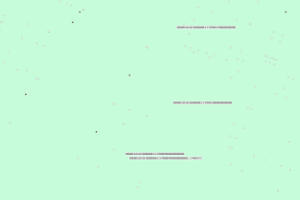

In [17]:
search_result[0]

In [10]:
search_result = gis.content.search('title:USA freeway system', item_type='Feature Layer', outside_org=True)
search_result

[<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_livingatlas>]

In [18]:
freeway_item = search_result[0]
#map1.add_layer(freeway_item)

In [29]:
# Use the first layer available on the service.
#freeway_feature_layer = freeway_item.layers[37]
freeway_feature_layer = freeway_item.layers[29]

# Print the layer's url and field names.
print(freeway_feature_layer.url, freeway_feature_layer.properties["name"])
for field in freeway_feature_layer.properties['fields']:
    print(field['name'])
    break

https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Consulta_54001/FeatureServer/48 (Avaluos) Zona Homogenea Geoeconomica Rural
objectid


In [34]:
freeway_feature_layer.properties

{
  "currentVersion": 10.91,
  "cimVersion": "2.9.0",
  "id": 48,
  "name": "(Avaluos) Zona Homogenea Geoeconomica Rural",
  "type": "Feature Layer",
  "parentLayer": null,
  "defaultVisibility": true,
  "minScale": 0,
  "maxScale": 0,
  "canScaleSymbols": false,
  "geometryType": "esriGeometryPolygon",
  "description": "File Geodatabase Feature Class - Polygon (C\u00f3digo, C\u00f3digo Zona Geoecon\u00f3mica, Valor Hect\u00e1rea, Subzona F\u00edsica, Vigencia)",
  "copyrightText": "IGAC",
  "editFieldsInfo": {
    "creationDateField": "created_date",
    "creatorField": "created_user",
    "editDateField": "last_edited_date",
    "editorField": "last_edited_user",
    "dateFieldsTimeReference": {
      "timeZone": "UTC",
      "respectsDaylightSaving": false
    }
  },
  "ownershipBasedAccessControlForFeatures": null,
  "syncCanReturnChanges": true,
  "relationships": [],
  "isDataVersioned": true,
  "isDataArchived": true,
  "infoInEstimates": [
    "extent",
    "count"
  ],
  "isDa

In [25]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "area_terreno", "opacity":0.75})
# Change map's extent:
extent = freeway_feature_layer.properties["extent"]
map1.extent = extent
#map1.zoom = 13

In [ ]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedColorRenderer", "field_name": "area_terreno", "opacity":0.75})
# Change map's extent:
extent = freeway_feature_layer.properties["extent"]
map1.extent = extent

In [26]:
map1.add_layer(freeway_feature_layer, {"renderer":"HeatmapRenderer", "opacity":0.75})
# Change map's extent:
extent = freeway_feature_layer.properties["extent"]
map1.extent = extent

In [35]:
from arcgis.features import FeatureLayer
fl = FeatureLayer(freeway_feature_layer.url, gis)
fl

<FeatureLayer url:"https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Consulta_54001/FeatureServer/48">

In [36]:
fl.properties

{
  "currentVersion": 10.91,
  "cimVersion": "2.9.0",
  "id": 48,
  "name": "(Avaluos) Zona Homogenea Geoeconomica Rural",
  "type": "Feature Layer",
  "parentLayer": null,
  "defaultVisibility": true,
  "minScale": 0,
  "maxScale": 0,
  "canScaleSymbols": false,
  "geometryType": "esriGeometryPolygon",
  "description": "File Geodatabase Feature Class - Polygon (C\u00f3digo, C\u00f3digo Zona Geoecon\u00f3mica, Valor Hect\u00e1rea, Subzona F\u00edsica, Vigencia)",
  "copyrightText": "IGAC",
  "editFieldsInfo": {
    "creationDateField": "created_date",
    "creatorField": "created_user",
    "editDateField": "last_edited_date",
    "editorField": "last_edited_user",
    "dateFieldsTimeReference": {
      "timeZone": "UTC",
      "respectsDaylightSaving": false
    }
  },
  "ownershipBasedAccessControlForFeatures": null,
  "syncCanReturnChanges": true,
  "relationships": [],
  "isDataVersioned": true,
  "isDataArchived": true,
  "infoInEstimates": [
    "extent",
    "count"
  ],
  "isDa

In [49]:
qfl_sr_original = fl.query("1=1",return_all_records=False, result_record_count=3)
qfl_reprojected = fl.query("1=1",return_all_records=False, result_record_count=3,out_sr="4326")

In [50]:
print(qfl_sr_original.features[0].geometry["spatialReference"], qfl_reprojected.features[0].geometry["spatialReference"])

{'wkid': 9377, 'latestWkid': 9377} {'wkid': 4326, 'latestWkid': 4326}


In [51]:
qfl_sr_original.sdf

,objectid,codigo,valor_hectarea,globalid,codigo_zona_geoeconomica,subzona_fisica,vigencia,created_user,created_date,last_edited_user,last_edited_date,Shape__Area,Shape__Length,SHAPE
0,1,5400100,3700000.0,{92298CBB-1B63-4587-8D75-AA438AD5B08E},20,0010,2013-01-01 05:00:00,JVARGAS,2023-04-26 22:32:39,JVARGAS,2023-04-26 22:32:39,345811.537565,5051.044499,"{""rings"": [[[5056789.404700001, 2488239.203700..."
1,2,5400100,4800000.0,{AB10FBBC-EF9C-4873-A60A-9B60C7982277},16,0022,2013-01-01 05:00:00,JVARGAS,2023-04-26 22:32:39,JVARGAS,2023-04-26 22:32:39,82734.547763,1340.918767,"{""rings"": [[[5058333.3091, 2485405.511499999],..."
2,3,5400100,4600000.0,{FC281BDD-6D45-4913-B7AC-D6EB11A2D48B},17,0022,2013-01-01 05:00:00,JVARGAS,2023-04-26 22:32:39,JVARGAS,2023-04-26 22:32:39,607229.690193,7847.432035,"{""rings"": [[[5060250.814100001, 2485541.896400..."


In [ ]:
map1.add_layer(fl, { "type": "FeatureLayer",
                             "renderer":"ClassedColorRenderer",
                             "field_name":"avaluo_terreno"})

In [123]:
map1.layers

[<FeatureLayer url:"https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Consulta_54001/FeatureServer/58">]

In [126]:
map1.add_layer(fl, { "type": "FeatureLayer",
                             "renderer":"autocast",
                             "field_name":"avaluo_terreno", "type": "classBreaks"})
# Change map's extent:
extent = freeway_feature_layer.properties["extent"]
map1.extent = extent

In [139]:
"""
    # only 1 numeric attribute
    # (a) to visualize with counts and amounts (color) + Customized class breaks
    # field_name here represents "The acres of total cropland as a percentage of land area in acres"
"""
map2 = gis.map('Colombia',13)

map2_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"avaluo_terreno",
                 "minValue":100000}

map2_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "avaluo_terreno",
                                        "stops": [  {
                                                        "value": 10,
                                                        "color": [237,248,251,204],
                                                        "label": "< 10"
                                                    },
                                                    {
                                                        "value": 25,
                                                        "color": [178,226,226,204],
                                                        "label": "10~39.5"
                                                    },
                                                    {
                                                        "value": 39.5,
                                                        "color": [102,194,164,204],
                                                        "label": "39.5"
                                                    },
                                                    {
                                                        "value": 54,
                                                        "color": [44,162,95,204],
                                                        "label": "39.5~68"
                                                    },
                                                    {
                                                        "value": 68,
                                                        "color": [0,109,44,204],
                                                        "label": "> 68"
                                                    }]
                                    }]

map2_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,204],
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            },
                                            "type": "esriSFS",
                                            "style": "esriSFSSolid"
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

map2.add_layer(fl,
               { "type": "FeatureLayer",
                 "renderer": map2_renderer,
                 "field_name":"avaluo_terreno",
                 "minValue":100000,
                 "definitionExpression": "avaluo_terreno > 0.001"})
# Change map's extent:
extent = freeway_feature_layer.properties["extent"]
map2.extent = extent
map2.layers


[<FeatureLayer url:"https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Consulta_54001/FeatureServer/58">]

In [140]:
map2

MapView(layout=Layout(height='400px', width='100%'))

In [156]:
"""
    # only 1 numeric attribute
    # (b) counts and amounts (size)
    # The field used here represent the harvested acres of Upland Cotton
"""
map3 = gis.map('Colombia',13)

map3_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"avaluo_terreno",
                 "transparency":20,
                 "minValue":1000000}

map3_renderer["visualVariables"] = [{   "type": "sizeInfo",
                                        "field": "avaluo_terreno",
                                        "valueUnit": "unknown",
                                        "minSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 16
                                                        },
                                                        {   "value": 144447,
                                                            "size": 16
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 4
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 4
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 2
                                                        }]
                                        },
                                        "maxSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 80
                                                        },
                                                        {   "value": 144447,
                                                            "size": 80
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 50
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 50
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 25
                                                        }]
                                        },
                                        "minDataValue": 0,
                                        "maxDataValue": 15000000
                                    },
                                    {   "type": "sizeInfo",
                                        "target": "outline",
                                        "expression": "view.scale",
                                        "stops": [{     "size": 2,
                                                        "value": 1080478
                                                    },
                                                    {   "size": 1,
                                                        "value": 6752990
                                                    },
                                                    {   "size": 1,
                                                        "value": 27011958
                                                    },
                                                    {   "size": 0,
                                                        "value": 54023916
                                                    }]
                                    }]

map3_renderer["classBreakInfos"] =     [{   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": [51,51,51,255],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

map3.add_layer(fl,
               { "type": "FeatureLayer",
                 "renderer":map3_renderer,
                 "field_name":"avaluo_terreno"})

lyr = Layer(freeway_feature_layer.url, gis)
map3.zoom_to_layer(lyr)
map3

MapView(layout=Layout(height='400px', width='100%'))

### Compare A to B

In [13]:
from arcgis.features import FeatureLayer
map4 = gis.map('France',2)

map4_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POP2025",
                 "transparency":80,
                 "minValue":-9007199254740991}

map4_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "POP2025",
                                        "normalizationField": "POP2015",
                                        "stops": [
                                            {   "value": 1.12,
                                                "color": [230,97,1,255],
                                                "label": "< 112%"
                                            },
                                            {   "value": 1.1800000000000002,
                                                "color": [253,184,99,255],
                                                "label": "112% ~ 124%"
                                            },
                                            {   "value": 1.24,
                                                "color": [247,247,247,255],
                                                "label": "124%"
                                            },
                                            {   "value": 1.3,
                                                "color": [178,171,210,255],
                                                "label": "124% ~ 136%"
                                            },
                                            {   "value": 1.36,
                                                "color": [94,60,153,255],
                                                "label": "> 136%"
                                            }]
                                    }]

map4_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,255],
                                            "size": 10.5,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

world_flayer = FeatureLayer("https://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0")

map4.add_layer(world_flayer,
               { "type": "FeatureLayer",
                 "renderer": map4_renderer,
                 "field_name":"POP2025",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "POP2015"})
map4.extent = world_flayer.properties.extent
map4

extent must be set to either a 2d list, spatially enabled data frame full_extent, or dict. Values specified must include xmin, ymin, xmax, ymax. Please see the API doc for more information


MapView(layout=Layout(height='400px', width='100%'))

In [16]:
world_flayer2 = FeatureLayer("https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Edicion_54001/FeatureServer/58", gis)

In [34]:
map4a = gis.map('Cucuta Colombia',10)

map4_renderer2 = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"avaluo_terreno",
                 "transparency":80,
                 "minValue":-9007199254740991}

map4_renderer2["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "avaluo_terreno",
                                        "normalizationField": "area_terreno",
                                        "stops": [
                                            {   "value": 1.12,
                                                "color": [230,97,1,255],
                                                "label": "< 112%"
                                            },
                                            {   "value": 1.1800000000000002,
                                                "color": [253,184,99,255],
                                                "label": "112% ~ 124%"
                                            },
                                            {   "value": 1.24,
                                                "color": [247,247,247,255],
                                                "label": "124%"
                                            },
                                            {   "value": 1.3,
                                                "color": [178,171,210,255],
                                                "label": "124% ~ 136%"
                                            },
                                            {   "value": 1.36,
                                                "color": [94,60,153,255],
                                                "label": "> 136%"
                                            }]
                                    }]

map4_renderer2["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,255],
                                            "size": 10.5,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

map4a.add_layer(world_flayer2,
               { "type": "FeatureLayer",
                 "renderer": map4_renderer2,
                 "field_name":"avaluo_terreno",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "area_terreno"})
map4a.extent = world_flayer2.properties.extent
map4a.zoom_to_layer(world_flayer2)
#map4a.basemap = 'dark-gray-vector'
map4a

extent must be set to either a 2d list, spatially enabled data frame full_extent, or dict. Values specified must include xmin, ymin, xmax, ymax. Please see the API doc for more information


MapView(layout=Layout(height='400px', width='100%'))

### Ejercicio

In [41]:
map5 = gis.map("Cucuta Colombia", 10)
map5.add_layer({"type":"FeatureLayer", 
               "url":"https://pruebascatastro.esri.co/server/rest/services/SERVICIOS/FS_Conservacion_Edicion_54001/FeatureServer/50",
               "renderer":"UniqueValueRenderer",
               "field_name":"servicio_publico",
               "opacity":0.1
              })
map5

MapView(layout=Layout(height='400px', width='100%'))

In [48]:
fls = gis.content.search("*", item_type="Feature Layer", max_items=100)
fls = [f for f in fls if f.type!="Feature Layer"]
fls

[<Item title:"FS_Avaluo_Asegurado_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"SGCLADM_OC" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"Evidencias de pruebas catastro" type:Feature Layer Collection owner:ejecutor_uno_cucuta>,
 <Item title:"V_Assignments_Dispatchers_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"Trabajo de Campo Conservacion_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"V_Assignments_Workers_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"V_Assignments_Dispatchers_54001" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"V_Assignments_Workers_54001" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"FS_Conservacion_Consulta_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"FS_Conservacion_Edicion_41298" type:Feature Layer Collection owner:adminsgcv2>,
 <Item title:"relaciones_mm" type:Table Layer owner:adminsgcv2>,
 